<center><h3>DCC - Sirius Education</h3></center>
<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="100px"border="1px"></p>
</div>

##Componentes:
* Gabriel Nunes Barbosa Nogueira
* Filipe Cruz
* Daniel Arnobio
* Xaiene
* Andred Deitos
##Projeto O-PY-THA_ON

###Descrição:
<br> 
### Nesse notebook constam, análises estátisticas com uso de bibliotecas e metódos que permitirá ter uma visão mais apurada sobre o banco de dados sobre o Consumo per capita. Basicamente, nesse notebook, os seguintes assuntos estão sendo abordados:
* Medidas de tendência central
* Medidas de dispersão



In [415]:
###Importando os pacotes necessários:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px

###Nesse primeiro momento, vamos está lendo os bancos de dados

In [416]:
#Inserindo os caminhos
caminho_produção='/content/drive/MyDrive/DCC_SIRIUS/pam_alimentos_cesta.xlsx'
caminho_produçao_2='/content/drive/MyDrive/DCC_SIRIUS/pam.xlsx'
caminho_consumo='/content/drive/MyDrive/DCC_SIRIUS/pof_rendimento_regiao_2.xlsx'
caminho_consumo_2='/content/drive/MyDrive/DCC_SIRIUS/consumo_2.xlsx'
caminho_medio_ano='/content/drive/MyDrive/DCC_SIRIUS/pof_media_consumo_kg_ano1.xlsx'

In [417]:
#Nessa etapa, vamos colocar a coluna "Ano" como index
producao = pd.read_excel(caminho_produção, index_col='Ano')
producao_2 = pd.read_excel(caminho_produçao_2)
consumo = pd.read_excel(caminho_consumo)
consumo_2=pd.read_excel(caminho_consumo_2)
consumo_medio_ano = pd.read_excel(caminho_medio_ano)

###Vamos começar vendo nossos dados e verificando as variáveis categoricas e númericas


###Verificar se existem valores categóricos, nessa análise estatística, devemos trabalhar com valores númericos.

In [418]:
consumo.head(3)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
0,Arroz polido,Brasil,18.22,20.48,20.28,18.80,14.86,15.57,12.40
1,Arroz polido,Norte,17.94,17.84,19.64,16.94,18.65,16.49,15.87
2,Arroz polido,Nordeste,20.33,22.35,22.21,19.58,14.12,15.28,10.86


In [419]:
consumo.dtypes

Items        object
Região       object
Total       float64
Classe F    float64
Classe E    float64
Classe D    float64
Classe C    float64
Classe B    float64
Classe A    float64
dtype: object

In [420]:
#Vamos atribuir as variedades do Feijão como Feijão para o dataset de consumo
consumo.loc[consumo['Items'].isin(['Feijão-mulatinho','Feijão']),'Items']='Feijão'
consumo.loc[consumo['Items'].isin(['Feijão-preto','Feijão']),'Items']='Feijão'

In [421]:
#Verificando
consumo['Items'].unique()

array([' Arroz polido', 'Feijão', 'Farinha de mandioca',
       'Farinha de trigo', 'Fubá de milho', 'Açúcar cristal',
       'Molho de tomate', 'Óleo de soja', 'Café moído'], dtype=object)

In [422]:
#Tirando o espaço de alguns items, em específico, o Arroz.
consumo.loc[consumo['Items'].isin([' Arroz polido','Arroz polido']),'Items']='Arroz polido'
consumo['Items'].unique()

array(['Arroz polido', 'Feijão', 'Farinha de mandioca',
       'Farinha de trigo', 'Fubá de milho', 'Açúcar cristal',
       'Molho de tomate', 'Óleo de soja', 'Café moído'], dtype=object)

In [423]:
 ###Vamos puxar algumas colunas
 consumo.columns

Index(['Items', 'Região', 'Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A'],
      dtype='object')

In [424]:
#Verificando novamente o DataSet
consumo.head(3)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
0,Arroz polido,Brasil,18.22,20.48,20.28,18.80,14.86,15.57,12.40
1,Arroz polido,Norte,17.94,17.84,19.64,16.94,18.65,16.49,15.87
2,Arroz polido,Nordeste,20.33,22.35,22.21,19.58,14.12,15.28,10.86


In [425]:
#Vamos excluir a coluna total já que ela não afeta a análise que está sendo feita.
#consumo=consumo.drop('Total',axis=1)

In [426]:
consumo.Items.unique()

array(['Arroz polido', 'Feijão', 'Farinha de mandioca',
       'Farinha de trigo', 'Fubá de milho', 'Açúcar cristal',
       'Molho de tomate', 'Óleo de soja', 'Café moído'], dtype=object)

In [427]:
#Verificando novamente o DataSet
consumo.head(3)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
0,Arroz polido,Brasil,18.22,20.48,20.28,18.80,14.86,15.57,12.40
1,Arroz polido,Norte,17.94,17.84,19.64,16.94,18.65,16.49,15.87
2,Arroz polido,Nordeste,20.33,22.35,22.21,19.58,14.12,15.28,10.86


In [428]:
consumo.drop('Total',axis=1,inplace=True)

#Vamos agora fazer algumas questões estatísticas para a tabela consumo.
* OBS: As análises serão feitas a nível nacional nesse momento, agrupando só por item, não por região.

#Medidas de dispersão

In [429]:
###Para as medidas de dispersão, vamos agrupar por item com relação ao consumo per capita de cada classe
consumo_Items=consumo.groupby('Items')[['Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]

# Desvio Padrão

In [430]:
###Vamos fazer algumas análises de variancia, desvio padrão, média, mediana
###Porém aqui só temos uma visão mais generalista, não obtemos uma análise que realmente
###possa importar
consumo_std=consumo_Items.std()
consumo_std

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,3.990517,5.443815,3.122484,3.504072,2.344071,1.927469
Açúcar cristal,1.379663,1.302454,1.105002,1.836164,1.021621,2.156961
Café moído,0.130179,0.187448,0.211156,0.197053,0.317091,0.480475
Farinha de mandioca,4.256274,4.448567,3.553926,4.254468,2.965417,1.873781
Farinha de trigo,2.587423,2.640641,2.818813,2.007683,1.806363,2.052089
Feijão,0.886694,0.850060,0.702217,0.695106,0.678063,0.616255
Fubá de milho,1.061979,0.710230,0.522255,0.310403,0.469241,0.266758
Molho de tomate,0.282660,0.342778,0.417680,0.333632,0.505902,0.457763
Óleo de soja,0.945784,1.243248,1.016596,0.848410,1.325435,0.738611


In [431]:
#Vamos verificar a classe que tem maior desvio padrão
desvio_padrao_max=consumo_std.max().reset_index()
desvio_padrao_max.columns
desvio_padrao_max=desvio_padrao_max.rename(columns={'index':'Classes',0:'Desvio Padrão'})
fig_std_max=px.bar(desvio_padrao_max.sort_values(by='Desvio Padrão',ascending=False),x='Classes',y='Desvio Padrão',color='Classes')
fig_std_max.update_layout(
    title='Desvio Padrão Máximo para cada Classe',
    template='plotly_white'
)
fig_std_max.update_traces(
  
    texttemplate='%{y:.2s}',
    textposition='outside'

)

In [432]:
##O maior desvio padrão percebido para cada classe está listado a cima, vemos então que a classe E
##com relação a todos os alimentos, tem maior desvio padrão!
## Agora, vamos ver como isso se dará por Item!
#Vamos criar uma função para automatizar nossos gráficos
#Vamos verificar a classe que tem maior desvio padrão
def desvio_padrao_viz(df,Titulo):
  desvio_padrao=df.std().reset_index()
  desvio_padrao=desvio_padrao.rename(columns={'index':'Classes',0:'Desvio Padrão'})
  fig_desvio_padrao=px.bar(desvio_padrao.sort_values(by='Desvio Padrão',ascending=False),x='Classes',y='Desvio Padrão',color='Classes')
  fig_desvio_padrao.update_layout(
      title=f'Desvio Padrão do {Titulo} para cada Classe',
      template='plotly_white'
  )
  return fig_desvio_padrao.update_traces(
    
      texttemplate='%{y:.4s}',
      textposition='outside'

  )

#Agora vamos fazer o desvio padrão por Item

In [433]:
desvio_padrao_viz(df_arroz,'Arroz')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [434]:
desvio_padrao_viz(df_acucar,'Açucar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [435]:
consumo.Items.unique()

array(['Arroz polido', 'Feijão', 'Farinha de mandioca',
       'Farinha de trigo', 'Fubá de milho', 'Açúcar cristal',
       'Molho de tomate', 'Óleo de soja', 'Café moído'], dtype=object)

In [436]:
desvio_padrao_viz(df_feijao,'Feijão')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [437]:
desvio_padrao_viz(df_far_mandioca,'Farinha de Mandioca')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [438]:
desvio_padrao_viz(df_cafe_moido,' Café Moído')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [439]:
desvio_padrao_viz(df_molho_tomate,'Molho de Tomate')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [440]:
desvio_padrao_viz(df_oleo_soja,'Óleo de Soja')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [441]:
desvio_padrao_viz(df_fuba,'Fubá de Milho')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



##Insights

* Qual o objetivo do desvio padrão para essa análise?
###Verificar o quão dispersos estão os dados de consumo percapita, ou seja, é importante para entendermos se nossos dados estão bem concentrados ou dispersos.

1. Em um primeiro momento, verificamos o consumo percapita do brasileiro com relação a cada classe economica, para uma análise mais geral. Vemos que a classe E tem um desvio padrão mais elevado.

## Porém, achamos importante verificar o mesmo estudo para cada item. Qual seria a classe que tem o maior desvio padrão nessa análise mais específica.
* Arroz-Classe E
* Açucar-Classe A
* Feijão-Classe F
* Farinha de Mandioca-Classe E
* Café moído-Classe A
* Molho de tomate-Classe B
* Óleo de Soja-Classe B
* Fubá de milho-Classe F

In [491]:
consumo['Consumo Total']=consumo['Classe F']+consumo['Classe E']+consumo['Classe D']+consumo['Classe C']+consumo['Classe B']+consumo['Classe A']

In [493]:
consumo1=consumo

In [498]:
consumo1['Classe F']=round((consumo['Classe F']/consumo['Consumo Total'])*100,2)
consumo1['Classe E']=round((consumo['Classe E']/consumo['Consumo Total'])*100,2)
consumo1['Classe D']=round((consumo['Classe D']/consumo['Consumo Total'])*100,2)
consumo1['Classe C']=round((consumo['Classe C']/consumo['Consumo Total'])*100,2)
consumo1['Classe B']=round((consumo['Classe B']/consumo['Consumo Total'])*100,2)
consumo1['Classe A']=round((consumo['Classe A']/consumo['Consumo Total'])*100,2)


In [500]:
consumo1=consumo1.rename(columns={
    'Classe A':'Classe A %',
    'Classe B':'Classe B %',
    'Classe C':'Classe C %',
    'Classe D':'Classe D %',
    'Classe E':'Classe E %',
    'Classe F':'Classe f %'
})

In [504]:
consumo1.head()
consumo1.to_csv('/content/consumoempercentagem.csv')

#Variância

In [442]:
consumo_var=consumo_Items.var()
consumo_var

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,15.924227,29.635120,9.749907,12.278520,5.494670,3.715137
Açúcar cristal,1.903470,1.696387,1.221030,3.371497,1.043710,4.652480
Café moído,0.016947,0.035137,0.044587,0.038830,0.100547,0.230857
Farinha de mandioca,18.115867,19.789747,12.630387,18.100497,8.793697,3.511057
Farinha de trigo,6.694760,6.972987,7.945707,4.030790,3.262947,4.211070
Feijão,0.786227,0.722602,0.493109,0.483172,0.459770,0.379770
Fubá de milho,1.127800,0.504427,0.272750,0.096350,0.220187,0.071160
Molho de tomate,0.079897,0.117497,0.174457,0.111310,0.255937,0.209547
Óleo de soja,0.894507,1.545667,1.033467,0.719800,1.756777,0.545547


#Medidas de tendência central
#Mediana

In [443]:
consumo_mediana=consumo_Items.median()
consumo_mediana

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,19.720,19.960,18.735,14.730,16.030,12.640
Açúcar cristal,6.230,6.490,6.540,6.330,4.675,4.360
Café moído,2.195,2.440,2.270,2.265,2.320,2.595
Farinha de mandioca,2.330,1.915,1.230,1.015,0.820,0.865
Farinha de trigo,1.310,1.535,1.900,1.750,2.075,1.820
Feijão,0.635,0.785,0.725,0.700,0.725,0.780
Fubá de milho,1.185,1.050,0.965,0.800,0.575,0.545
Molho de tomate,0.480,0.580,0.745,1.110,1.225,1.595
Óleo de soja,4.480,4.700,5.195,4.775,4.120,3.340


#Média

In [444]:
consumo_media=consumo_Items.mean()
consumo_media

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,20.373333,21.760000,19.093333,16.020000,15.595000,12.578333
Açúcar cristal,6.525000,6.926667,6.555000,6.271667,4.775000,4.660000
Café moído,2.176667,2.388333,2.286667,2.305000,2.323333,2.551667
Farinha de mandioca,3.576667,3.576667,2.746667,2.858333,2.048333,1.808333
Farinha de trigo,2.150000,2.426667,2.936667,2.515000,2.526667,2.445000
Feijão,0.994167,1.092500,1.000000,0.860833,0.816667,0.806667
Fubá de milho,1.580000,1.236667,1.045000,0.875000,0.723333,0.630000
Molho de tomate,0.488333,0.618333,0.791667,1.065000,1.258333,1.483333
Óleo de soja,4.713333,5.036667,4.996667,4.470000,3.991667,3.436667


#1 quartil

In [445]:
q1=consumo_Items.quantile(0.25)
q1       

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,18.1200,19.4075,17.3725,14.2400,15.3525,11.2450
Açúcar cristal,5.8975,6.0450,5.8550,5.4625,4.0600,2.9875
Café moído,2.0800,2.2650,2.1375,2.1725,2.0750,2.4650
Farinha de mandioca,0.6425,0.6425,0.5475,0.4375,0.5450,0.4625
Farinha de trigo,0.9475,1.2000,1.6500,1.6800,1.4100,1.6925
Feijão,0.4800,0.5550,0.5025,0.3300,0.3225,0.3875
Fubá de milho,0.9825,0.8850,0.8100,0.7125,0.4125,0.4675
Molho de tomate,0.2875,0.3875,0.5325,0.8375,0.9050,1.3075
Óleo de soja,4.0250,4.2900,4.6400,4.2525,3.2200,3.0875


#2 quartil

In [446]:
consumo_Items.quantile(0.50)

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,19.720,19.960,18.735,14.730,16.030,12.640
Açúcar cristal,6.230,6.490,6.540,6.330,4.675,4.360
Café moído,2.195,2.440,2.270,2.265,2.320,2.595
Farinha de mandioca,2.330,1.915,1.230,1.015,0.820,0.865
Farinha de trigo,1.310,1.535,1.900,1.750,2.075,1.820
Feijão,0.635,0.785,0.725,0.700,0.725,0.780
Fubá de milho,1.185,1.050,0.965,0.800,0.575,0.545
Molho de tomate,0.480,0.580,0.745,1.110,1.225,1.595
Óleo de soja,4.480,4.700,5.195,4.775,4.120,3.340


#3 quartil

In [447]:
q3=consumo_Items.quantile(0.75)
q3

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,
Arroz polido,21.8825,21.7275,19.3850,17.7025,16.6925,12.9700
Açúcar cristal,6.5175,7.1900,7.1350,7.7375,5.6875,6.3850
Café moído,2.2875,2.5175,2.3725,2.4625,2.5125,2.7850
Farinha de mandioca,4.0325,4.1925,3.0600,2.7100,1.5900,3.1350
Farinha de trigo,1.4250,1.8400,2.4650,2.3600,2.7100,2.3825
Feijão,1.1725,1.3850,1.3975,1.3200,1.0725,1.0575
Fubá de milho,1.9200,1.3875,1.1950,0.8275,0.8425,0.6900
Molho de tomate,0.5900,0.9000,0.9875,1.2550,1.5225,1.7400
Óleo de soja,5.2500,5.3875,5.5175,4.9450,4.5325,4.0125


### Nessa etapa vamos identificar o limite superior e inferior do nosso conjunto de dados, para verificarmos o que vamos fazer com eles, usaremos o seguinte procedimento.
* superior = Q3 + 1,5 * IQR

* inferior = Q1 - 1,5 * IQR

In [448]:
#limite superior
IQR=(q3-q1)
limite_superior=q3+1.5*IQR

In [449]:
#limite inferior
limite_inferior=q1-1.5*IQR

#Descrição dos dados por item.

In [450]:
def estatistica_basica(Item): 
  return consumo[consumo['Items']==Item].describe() 

In [451]:
lista_itens=list(consumo.Items.unique())

In [452]:
[item for item in lista_itens]

['Arroz polido',
 'Feijão',
 'Farinha de mandioca',
 'Farinha de trigo',
 'Fubá de milho',
 'Açúcar cristal',
 'Molho de tomate',
 'Óleo de soja',
 'Café moído']

In [453]:
#Gerando describe automático para cada Item
est_arroz,est_feijao,est_mandioca,est_trigo,est_fuba_milho,est_acucar,est_molho,est_oleo,est_cafe=[estatistica_basica(item) for item in lista_itens]

In [454]:
#Visualizando o describe do Arroz, por exemplo:
est_arroz

,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,20.373333,21.760000,19.093333,16.020000,15.595000,12.578333
std,3.990517,5.443815,3.122484,3.504072,2.344071,1.927469
min,15.580000,16.810000,15.770000,12.160000,11.290000,10.460000
25%,18.120000,19.407500,17.372500,14.240000,15.352500,11.245000
50%,19.720000,19.960000,18.735000,14.730000,16.030000,12.640000
75%,21.882500,21.727500,19.385000,17.702500,16.692500,12.970000
max,27.030000,32.290000,24.800000,21.730000,18.180000,15.870000


#BoxPlot
* Gráficos de boxplot gerados para cada classe em nível nacional

In [455]:
px.box(consumo,x='Items', y='Classe A',title = 'Disperção dos dados de consumo da Classe A por alimento da cesta básica - 2017-2018')

In [456]:
px.box(consumo,x='Items', y='Classe B',title = 'Disperção dos dados de consumo da Classe B por alimento da cesta básica - 2017-2018')

In [457]:
px.box(consumo,x='Items', y='Classe C',title = 'Disperção dos dados de consumo da Classe C por alimento da cesta básica - 2017-2018')

In [458]:
px.box(consumo,x='Items', y='Classe D',title = 'Disperção dos dados de consumo da Classe D por alimento da cesta básica - 2017-2018')

In [459]:
px.box(consumo,x='Items', y='Classe E',title = 'Disperção dos dados de consumo da Classe E por alimento da cesta básica - 2017-2018')

In [460]:
px.box(consumo,x='Items', y='Classe F',title = 'Disperção dos dados de consumo da Classe F por alimento da cesta básica - 2017-2018')

#Displot(Sem tratamento) (Melhorar)


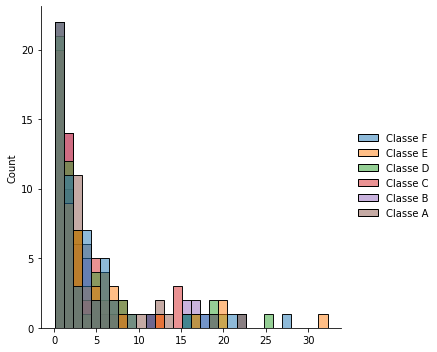

In [461]:
sns.displot(consumo)

#Visualizando o maior consumo de cada classe
* Nosso objetivo aqui também é vericar a região e o item mais consumido por essa classe

In [462]:
consumo.sort_values('Classe A' ,ascending=False).head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
1,Arroz polido,Norte,17.84,19.64,16.94,18.65,16.49,15.87


In [463]:
consumo.sort_values('Classe B' ,ascending=False).head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,27.03,32.29,24.8,21.73,18.18,12.88


In [464]:
consumo.sort_values('Classe C' ,ascending=False).head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,27.03,32.29,24.8,21.73,18.18,12.88


In [465]:
consumo.sort_values('Classe D' ,ascending=False).head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,27.03,32.29,24.8,21.73,18.18,12.88


In [466]:
consumo.sort_values('Classe E' ,ascending=False).head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,27.03,32.29,24.8,21.73,18.18,12.88


In [467]:
consumo.sort_values('Classe F' ,ascending=False).head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,27.03,32.29,24.8,21.73,18.18,12.88


In [468]:
consumo.columns

Index(['Items', 'Região', 'Classe F', 'Classe E', 'Classe D', 'Classe C',
       'Classe B', 'Classe A'],
      dtype='object')

#Separando as variaveis Númericas para verificação da distribuição normal de nossos dados.
### Ele é usado basicamente para um conjunto de observações e o visualiza por meio de um histograma, ou seja, para realizarmos uma observação e, portanto, escolhemos algumas colunas.

* **Essa distribuição se baseia no consumo alimentar dos brasileiros por classe.**

In [469]:
#Vamos separar as variáveis númericas das categoricas para estudarmos a distribuição normal
#do consumo percapita entre as classes
consumo_num=consumo[['Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



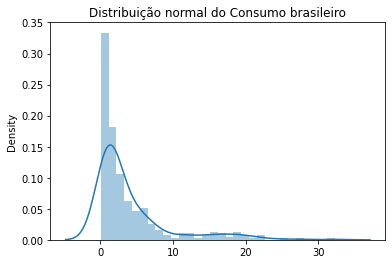

In [470]:
sns.distplot(consumo_num).set_title("Distribuição normal do Consumo brasileiro");

In [471]:
consumo['Região'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [472]:
##Verificando se temos valores unicos
consumo.nunique()

Items        9
Região       6
Classe F    56
Classe E    56
Classe D    58
Classe C    55
Classe B    56
Classe A    55
dtype: int64

In [473]:
###Verificando se temos valores duplicados
consumo.duplicated().sum()

0

In [474]:
###Verificamos se temos valores nulos
consumo.isna().sum()

Items       0
Região      0
Classe F    0
Classe E    0
Classe D    0
Classe C    0
Classe B    0
Classe A    0
dtype: int64

### Agora, o próximo passo é analisar por região por meio das querys

In [475]:
consumo_nordeste = consumo[consumo['Região']=='Nordeste']
consumo_centro_oeste = consumo[consumo['Região']=='Centro-Oeste']
consumo_norte = consumo[consumo['Região']=='Norte']
consumo_sul = consumo[consumo['Região']=='Sul']
consumo_sudeste = consumo[consumo['Região']=='Sudeste']
consumo_brasil = consumo[consumo['Região']=='Brasil']

#Fazendo uma análise visual dos dados através dos boxplots
###O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).

In [476]:
fig_brasil = px.box(consumo_brasil, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao nordeste')
fig_brasil.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig_brasil.show()

In [477]:
fig = px.box(consumo_nordeste, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao nordeste')
fig.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig.show()

In [478]:
fig2 = px.box(consumo_norte, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao norte')
fig2.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig2.show()

In [479]:
fig3 = px.box(consumo_sul, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao sul')
fig3.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig3.show()

In [480]:
fig4= px.box(consumo_sudeste, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao sudeste')
fig4.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig4.show()

In [481]:
fig5 = px.box(consumo_centro_oeste, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao centro-oeste')
fig5.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig5.show()

#Agora, vamos usar o statsmodel para tirarmos algumas conclusões estatisticas mais aprofundadas usando o modelo de regressão linear de várias variáveis.


*   **Nosso objetivo aqui é verificar como o consumo de cada item para cada classe influencia no total**




## Nesse momento, vamos dividir o dataset de consumo por item e depois usar o statsmodel para verificarmos de forma estatística como o consumo per capita de cada classe influencia no total, isso separado por item.

In [482]:
#Vamos separar
#Feijão
# Farinha de mandioca
# Farinha de trigo
# Fubá de milho
# Açúcar cristal
# Molho de tomate
# Óleo de soja
# Café moído
#Conaulta feita de forma manual, nessa etapa tinhamos que copiar item por item
#Atribuir a uma variável e rodar para ser armazenado
# Vamos usar o %%time para verificarmos o tempo de execução para o metódo manual e automático
%%time
df_arroz1=consumo[consumo['Items']==' Arroz polido']
df_feijao1=consumo[consumo['Items']=='Feijão']
df_far_mandioca1=consumo[consumo['Items']=='Farinha de mandioca']
df_far_trigo1=consumo[consumo['Items']=='Farinha de trigo']
df_fuba1=consumo[consumo['Items']=='Fubá de milho']
df_acucar1=consumo[consumo['Items']=='Açúcar cristal']
df_molho_tomate1=consumo[consumo['Items']=='Molho de tomate']
df_oleo_soja1=consumo[consumo['Items']=='Óleo de soja']
df_cafe_moido1=consumo[consumo['Items']=='Café moído']

CPU times: user 4.7 ms, sys: 0 ns, total: 4.7 ms
Wall time: 7.36 ms


In [483]:
#Na automatização, vamos fazer com que o Python faça todo o processo
#vamos automatizar essas consultas:
#primeiro passo é pegar os nomes dos itens e armazenar em uma lista
#A ordem de como os items estão dispostos é importante para os próximos passos
lista_itens=list(consumo['Items'].unique())
lista_itens

['Arroz polido',
 'Feijão',
 'Farinha de mandioca',
 'Farinha de trigo',
 'Fubá de milho',
 'Açúcar cristal',
 'Molho de tomate',
 'Óleo de soja',
 'Café moído']

In [484]:
#Segundo,vamos criar uma lista vazia que irá armazenar cada consulta
%%time
lista_df=[]
for item in lista_itens:
  lista_df.append(consumo[consumo['Items']==item])


CPU times: user 8.99 ms, sys: 44 µs, total: 9.03 ms
Wall time: 10.4 ms


In [485]:
# Nessa etapa, só basta atribuir cada variável a uma consulta específica 
#armazenada em uma List Comprehension, as variáveis terão seus valores
#atribuidos respeitando a ordem de cada item gerado pela lista_itens
%%time
df_arroz,df_feijao,df_far_mandioca,df_far_trigo,df_fuba,df_acucar,df_molho_tomate,df_oleo_soja,df_cafe_moido=[dfs for dfs in lista_df]

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.7 µs


In [486]:
#Conferindo se a atribuição foi feita de maneira correta
df_feijao.head(1)

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
6,Feijão,Brasil,0.89,0.88,0.68,0.46,0.33,0.44


In [487]:
df_arroz[:1]

,Items,Região,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
0,Arroz polido,Brasil,20.48,20.28,18.8,14.86,15.57,12.4
